In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import kmax as kx
import utility as util

# Testing Tree Path Covers

In [2]:
def draw_path_cover(tree, layout):
    path = util.path_cover(tree)
    nx.draw_networkx_nodes(tree, pos=layout, node_size=40)
    nx.draw_networkx_labels(tree, pos=layout, font_size=8)
    nx.draw_networkx_edges(nx.DiGraph(tree), pos=layout, edgelist=path, edge_color="tab:red", arrows=True)
    #nx.draw_networkx_edges(tree, pos=layout, edgelist=[x for x in tree.edges() if x not in path])

### Random tree with edge weights in [0,1)

In [3]:
n = 20
tree = nx.random_labeled_tree(20)

for s,t in tree.edges():
    tree[s][t]['weight'] = random.random() # assign a random edge weight in [0,1)

{13: 0, 18: 0, 7: 0, 16: 0, 8: 0, 19: 0, 17: 0, 14: 1, 12: 1, 15: 3, 2: 1, 3: 2, 10: 5, 9: 3, 4: 6, 11: 5, 1: 7, 6: 14, 5: 14, 0: 15}


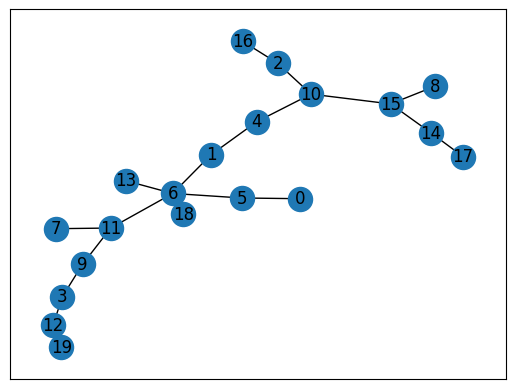

In [12]:
ones_tree = nx.random_labeled_tree(20)
for s,t in ones_tree.edges():
    ones_tree[s][t]['weight'] = 1

layout = nx.spring_layout(ones_tree)
nx.draw_networkx(ones_tree, pos=layout)

print(util.path_cover_two(ones_tree))

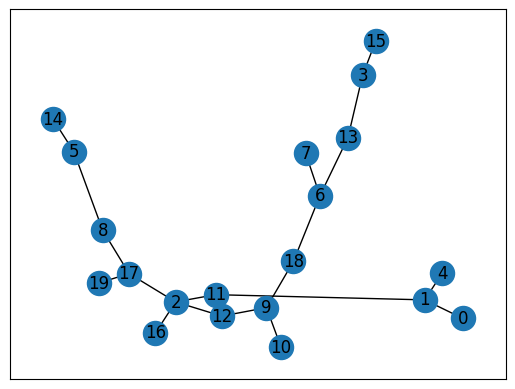

In [4]:
layout = nx.spring_layout(tree)
nx.draw_networkx(tree, pos=layout)

4: (0, 0.7007160925853176, None, None)
16: (0, 0.6722551427358967, None, None)
19: (0, 0.8755965396060659, None, None)
10: (0, 0.5237904673244869, None, None)
14: (0, 0.48474064676050244, None, None)
7: (0, 0.2096309313042498, None, None)
15: (0, 0.5463352459026488, None, None)
3: (0.5463352459026488, 0.21243070138101183, 15, None)
13: (0.7587659472836606, 0.3187236931709134, 3, None)
6: (1.287120571758824, 0.13116609102221544, 13, 7)
5: (0.48474064676050244, 0.15458208634318538, 14, None)
18: (1.4182866627810395, 0.6280723282289213, 6, None)
8: (0.6393227331036878, 0.6297008274410864, 5, None)
9: (2.5701494583344475, 0.20753202767891976, 18, 10)
17: (2.1446201001508403, 0.13009176415095036, 19, 8)
12: (2.777681486013367, 0.6888475781800993, 9, None)
2: (6.283404307080204, 0.07199198672318985, 12, 16)
11: (6.355396293803394, 0.02884716460986403, 2, None)
1: (7.084959550998576, 0.38533316459414846, 4, 11)
0: (7.470292715592724, 0, 1, None)
Path edges: [(3, 15), (13, 3), (6, 13), (5, 14)

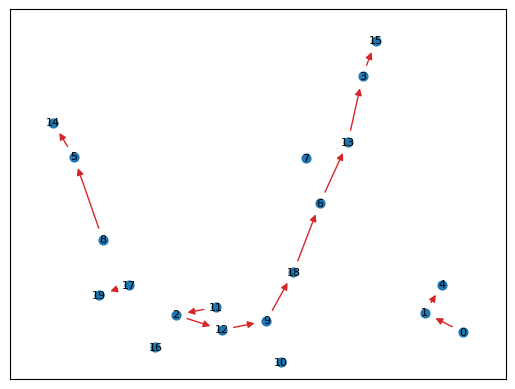

In [5]:
draw_path_cover(tree, layout)

In [6]:
nx.get_edge_attributes(tree, 'weight')

{(0, 1): 0.4141803292040125,
 (1, 4): 0.7007160925853176,
 (1, 11): 0.02884716460986403,
 (2, 11): 0.7442471294590866,
 (2, 16): 0.6722551427358967,
 (2, 12): 0.6888475781800993,
 (2, 17): 0.7597925915920367,
 (3, 15): 0.5463352459026488,
 (3, 13): 0.21243070138101183,
 (5, 14): 0.48474064676050244,
 (5, 8): 0.15458208634318538,
 (6, 7): 0.2096309313042498,
 (6, 13): 0.3187236931709134,
 (6, 18): 0.34079702232646525,
 (8, 17): 0.6297008274410864,
 (9, 10): 0.5237904673244869,
 (9, 18): 0.6280723282289213,
 (9, 12): 0.7313224950034066,
 (17, 19): 0.8755965396060659}

Upper bound: 

$$n-1-\sum_{v\in V}{(d(v)-2))$$

### Unit edge weights

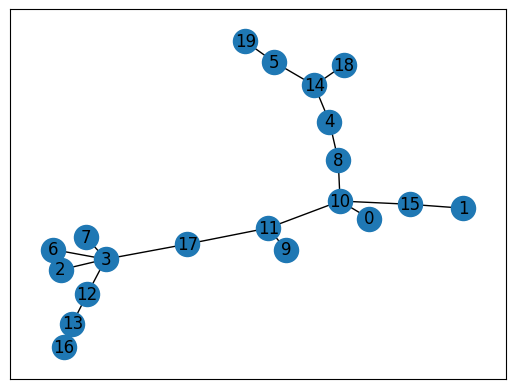

In [7]:
ones_tree = nx.random_labeled_tree(20)
for s,t in ones_tree.edges():
    ones_tree[s][t]['weight'] = 1

ones_layout = nx.spring_layout(ones_tree)
nx.draw_networkx(ones_tree, pos=ones_layout)

1: (0, 1, None, None)
9: (0, 1, None, None)
2: (0, 1, None, None)
6: (0, 1, None, None)
7: (0, 1, None, None)
18: (0, 1, None, None)
19: (0, 1, None, None)
16: (0, 1, None, None)
13: (1, 1, 16, None)
5: (1, 1, 19, None)
12: (2, 1, 13, None)
14: (3, 0, 5, 18)
3: (4, 0, 6, 2)
4: (3, 1, 14, None)
17: (4, 1, 3, None)
8: (4, 1, 4, None)
11: (6, 0, 17, 9)
15: (1, 1, 1, None)
10: (13, 0, 8, 15)
0: (13, 0, 10, None)
Path edges: [(13, 16), (5, 19), (12, 13), (14, 5), (3, 6), (8, 4), (11, 17), (11, 9), (15, 1), (10, 8), (10, 15)]
Total path length (x(root)): 13
Total path length (actual): 11
Difference: -2


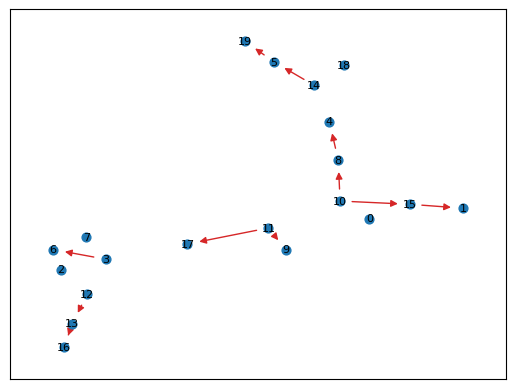

In [8]:
draw_path_cover(ones_tree, ones_layout)